# Classification

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [45]:
COMBINED_PROCESSED_DATASET_PATH = "../datasets/processed/combined_dataset.json"
combined_dataset = pd.read_json(COMBINED_PROCESSED_DATASET_PATH)
combined_dataset

,RouteID,station_code,date_YYYY_MM_DD,departure_time_utc,executor_capacity_cm3,Zone,starting_point,StopID,PackageID,planned_service_time_seconds,...,StartLat,StartLon,StopLat,StopLon,distance_lat,distance_lon,PackageType,vehicleType,euclidean_distance,DistanceCategory
0,RouteID_00092558-dece-4fb7-8d0d-7d0df3a4864e,DLA8,2018-06-17,17:23:00,3539605.75,K-21,UZ,AH,PackageID_fd17bd67-a3d8-45b9-936b-c7e9d879102e,31.5,...,33.918699,-118.324843,33.885480,-118.344553,0.033219,0.019710,medium,medium,0.038626,small
1,RouteID_00092558-dece-4fb7-8d0d-7d0df3a4864e,DLA8,2018-06-17,17:23:00,3539605.75,K-21,UZ,AH,PackageID_f78261e7-4c8c-4d72-b007-9934a53a700b,31.5,...,33.918699,-118.324843,33.885480,-118.344553,0.033219,0.019710,small,medium,0.038626,small
2,RouteID_00092558-dece-4fb7-8d0d-7d0df3a4864e,DLA8,2018-06-17,17:23:00,3539605.75,K-21,UZ,AJ,PackageID_a8e394ee-4208-412d-8b34-8cbce880a322,40.0,...,33.918699,-118.324843,33.902808,-118.355223,0.015891,0.030380,small,medium,0.034285,small
3,RouteID_00092558-dece-4fb7-8d0d-7d0df3a4864e,DLA8,2018-06-17,17:23:00,3539605.75,K-21,UZ,AL,PackageID_b7c39ed4-fa0a-497a-ae0c-e3515734f8ae,47.0,...,33.918699,-118.324843,33.893616,-118.358108,0.025083,0.033265,medium,medium,0.041662,small
4,RouteID_00092558-dece-4fb7-8d0d-7d0df3a4864e,DLA8,2018-06-17,17:23:00,3539605.75,K-21,UZ,AL,PackageID_e980c24b-ab88-4af1-b3f9-1f851823f561,47.0,...,33.918699,-118.324843,33.893616,-118.358108,0.025083,0.033265,large,medium,0.041662,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714564,RouteID_ffdd3b7f-9de4-4a0b-8c07-d186bf7f2dee,DLA7,2018-07-08,15:42:06,3539605.75,G-18,XL,YU,PackageID_b0bad72b-041e-4b5b-8303-03131c837b8d,38.3,...,33.965477,-117.653303,34.152862,-117.502335,0.187385,0.150968,large,medium,0.240633,large
714565,RouteID_ffdd3b7f-9de4-4a0b-8c07-d186bf7f2dee,DLA7,2018-07-08,15:42:06,3539605.75,G-18,XL,YU,PackageID_b2c6f0de-6fcf-4616-b2cd-ba63ef6d0715,38.3,...,33.965477,-117.653303,34.152862,-117.502335,0.187385,0.150968,large,medium,0.240633,large
714566,RouteID_ffdd3b7f-9de4-4a0b-8c07-d186bf7f2dee,DLA7,2018-07-08,15:42:06,3539605.75,G-18,XL,YU,PackageID_3de4b3fd-d80d-4ae7-a519-c82a4e46c48c,38.3,...,33.965477,-117.653303,34.152862,-117.502335,0.187385,0.150968,large,medium,0.240633,large
714567,RouteID_ffdd3b7f-9de4-4a0b-8c07-d186bf7f2dee,DLA7,2018-07-08,15:42:06,3539605.75,G-18,XL,ZQ,PackageID_59aae7fe-cbb2-47c8-8c2f-59a97154ccd9,102.0,...,33.965477,-117.653303,34.155712,-117.528523,0.190235,0.124780,large,medium,0.227507,large


In [87]:
combined_dataset.columns

Index(['RouteID', 'station_code', 'date_YYYY_MM_DD', 'departure_time_utc',
       'executor_capacity_cm3', 'Zone', 'starting_point', 'StopID',
       'PackageID', 'planned_service_time_seconds', 'depth_cm', 'height_cm',
       'weight_cm', 'time_to_arrive', 'day_of_week', 'month', 'StartLat',
       'StartLon', 'StopLat', 'StopLon', 'distance_lat', 'distance_lon',
       'PackageType', 'vehicleType', 'euclidean_distance', 'DistanceCategory'],
      dtype='object')

## Route classifier

In [47]:
from sklearn.model_selection import *

In [48]:
# Define X as the combined_dataset without the target column (target column is "vehicleType")
y = combined_dataset["Zone"] 
X = combined_dataset.drop("Zone", axis=1)

Clean the X columns.

In [119]:
X.columns

Index(['RouteID', 'station_code', 'date_YYYY_MM_DD', 'departure_time_utc',
       'executor_capacity_cm3', 'Zone', 'starting_point', 'StopID',
       'PackageID', 'planned_service_time_seconds', 'depth_cm', 'height_cm',
       'weight_cm', 'time_to_arrive', 'day_of_week', 'month', 'StartLat',
       'StartLon', 'StopLat', 'StopLon', 'distance_lat', 'distance_lon',
       'PackageType', 'euclidean_distance', 'DistanceCategory'],
      dtype='object')

In [49]:
# Unique values in the target column with their counts
y.value_counts()

Zone
C-5     8852
C-2     8798
A-2     8706
A-3     8624
C-6     8188
        ... 
O-8      196
M-13     186
L-20     186
O-9      175
M-1      171
Name: count, Length: 331, dtype: int64

In [50]:
X = X[['date_YYYY_MM_DD', 'departure_time_utc', 'StopID', 'depth_cm', 'height_cm','weight_cm', 'day_of_week', 'StopLat', 'StopLon']]
X

,date_YYYY_MM_DD,departure_time_utc,StopID,depth_cm,height_cm,weight_cm,day_of_week,StopLat,StopLon
0,2018-06-17,17:23:00,AH,40.6,12.7,30.5,Sunday,33.885480,-118.344553
1,2018-06-17,17:23:00,AH,25.4,12.7,17.8,Sunday,33.885480,-118.344553
2,2018-06-17,17:23:00,AJ,25.4,12.7,17.8,Sunday,33.902808,-118.355223
3,2018-06-17,17:23:00,AL,37.1,6.1,21.8,Sunday,33.893616,-118.358108
4,2018-06-17,17:23:00,AL,44.5,20.3,35.6,Sunday,33.893616,-118.358108
...,...,...,...,...,...,...,...,...,...
714564,2018-07-08,15:42:06,YU,66.0,17.8,40.6,Sunday,34.152862,-117.502335
714565,2018-07-08,15:42:06,YU,61.6,10.8,41.3,Sunday,34.152862,-117.502335
714566,2018-07-08,15:42:06,YU,48.3,30.5,36.8,Sunday,34.152862,-117.502335
714567,2018-07-08,15:42:06,ZQ,48.3,15.2,33.0,Sunday,34.155712,-117.528523


In [51]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)
X['date_YYYY_MM_DD'] = le.fit_transform(X['date_YYYY_MM_DD'])
X['departure_time_utc'] = le.fit_transform(X['departure_time_utc'])
X['StopID'] = le.fit_transform(X['StopID'])
X['day_of_week'] = le.fit_transform(X['day_of_week'])
X

,date_YYYY_MM_DD,departure_time_utc,StopID,depth_cm,height_cm,weight_cm,day_of_week,StopLat,StopLon
0,16,2289,7,40.6,12.7,30.5,3,33.885480,-118.344553
1,16,2289,7,25.4,12.7,17.8,3,33.885480,-118.344553
2,16,2289,9,25.4,12.7,17.8,3,33.902808,-118.355223
3,16,2289,11,37.1,6.1,21.8,3,33.893616,-118.358108
4,16,2289,11,44.5,20.3,35.6,3,33.893616,-118.358108
...,...,...,...,...,...,...,...,...,...
714564,36,1766,644,66.0,17.8,40.6,3,34.152862,-117.502335
714565,36,1766,644,61.6,10.8,41.3,3,34.152862,-117.502335
714566,36,1766,644,48.3,30.5,36.8,3,34.152862,-117.502335
714567,36,1766,666,48.3,15.2,33.0,3,34.155712,-117.528523


In [52]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=42)

In [53]:
X

,date_YYYY_MM_DD,departure_time_utc,StopID,depth_cm,height_cm,weight_cm,day_of_week,StopLat,StopLon
0,16,2289,7,40.6,12.7,30.5,3,33.885480,-118.344553
1,16,2289,7,25.4,12.7,17.8,3,33.885480,-118.344553
2,16,2289,9,25.4,12.7,17.8,3,33.902808,-118.355223
3,16,2289,11,37.1,6.1,21.8,3,33.893616,-118.358108
4,16,2289,11,44.5,20.3,35.6,3,33.893616,-118.358108
...,...,...,...,...,...,...,...,...,...
714564,36,1766,644,66.0,17.8,40.6,3,34.152862,-117.502335
714565,36,1766,644,61.6,10.8,41.3,3,34.152862,-117.502335
714566,36,1766,644,48.3,30.5,36.8,3,34.152862,-117.502335
714567,36,1766,666,48.3,15.2,33.0,3,34.155712,-117.528523


In [54]:
X["day_of_week"].value_counts()

day_of_week
2    125662
5    122525
4    105262
3    100136
6     92128
0     84804
1     84052
Name: count, dtype: int64

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [56]:
y_test

array([113,  70, 180, ...,  85, 292,  66])

In [57]:
from sklearn.preprocessing import LabelEncoder
# Convertir las etiquetas a valores numéricos binarios (0 y 1)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# # Entrenar el modelo con 'y_train_encoded' y evaluar con 'y_test_encoded'
decision_tree.fit(X_train, y_train_encoded)
y_pred_encoded = decision_tree.predict(X_test)

Results:



In [59]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
print(f"Precisión del modelo: {accuracy:.2f}")

# Mostrar el reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test_encoded, y_pred_encoded))

Precisión del modelo: 1.00
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1807
           1       1.00      1.00      1.00      1173
           2       1.00      1.00      1.00      1272
           3       1.00      1.00      1.00       559
           4       1.00      1.00      1.00      1395
           5       1.00      1.00      1.00      1079
           6       1.00      1.00      1.00      1226
           7       1.00      1.00      1.00       858
           8       1.00      1.00      1.00       692
           9       1.00      1.00      1.00       753
          10       1.00      1.00      1.00       649
          11       1.00      1.00      1.00      2651
          12       1.00      1.00      1.00       968
          13       1.00      1.00      1.00      1331
          14       1.00      1.00      1.00       689
          15       1.00      1.00      1.00       269
          16       1.00     

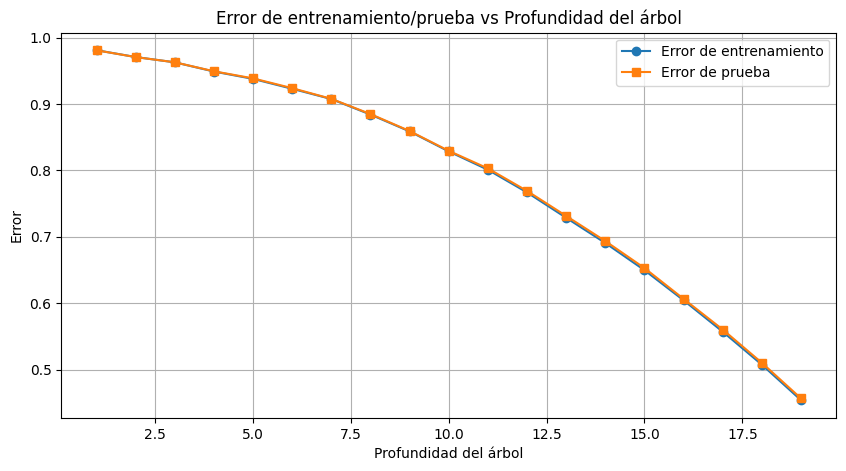

([0.9808935661478054,
  0.9706436251244507,
  0.9626767799951219,
  0.9488262647991396,
  0.9377366562841115,
  0.9228285598902835,
  0.9073766788351812,
  0.8840059336502745,
  0.8586559722349949,
  0.8285378989919991,
  0.8008808511829315,
  0.7667723581461741,
  0.728555492025158,
  0.690602521401525,
  0.6496687311824518,
  0.6043006969240181,
  0.5569954298097953,
  0.5073610850103358,
  0.45390225470713597],
 [0.9808089713627309,
  0.9705697132541249,
  0.9627235027125871,
  0.9491675646426055,
  0.9384898143872072,
  0.9237490145588723,
  0.907664749429727,
  0.8847512023547961,
  0.8592160320192563,
  0.8293752419870225,
  0.8028977800168866,
  0.7689939404117161,
  0.7313209342681612,
  0.6935033190123664,
  0.6528774880930723,
  0.606443968633817,
  0.5602623489184637,
  0.5101716183625584,
  0.45657295063231496])

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Simularemos algunos datos de ejemplo ya que no tenemos el conjunto de datos real.
# Crearemos un dataset sintético para la demostración.

# Variables para almacenar los errores de entrenamiento y prueba para diferentes profundidades
train_errors = []
test_errors = []


# Probamos diferentes profundidades de árboles
max_depth_values = range(1, 20)
for max_depth in max_depth_values:
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train, y_train)

    # Predecimos y calculamos el error en el conjunto de entrenamiento
    y_train_pred = clf.predict(X_train)
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    train_errors.append(train_error)

    # Predecimos y calculamos el error en el conjunto de prueba
    y_test_pred = clf.predict(X_test)
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    test_errors.append(test_error)

# Graficamos los errores
plt.figure(figsize=(10, 5))
plt.plot(max_depth_values, train_errors, label='Error de entrenamiento', marker='o')
plt.plot(max_depth_values, test_errors, label='Error de prueba', marker='s')
plt.xlabel('Profundidad del árbol')
plt.ylabel('Error')
plt.title('Error de entrenamiento/prueba vs Profundidad del árbol')
plt.legend()
plt.grid(True)
plt.show()

# Retornaremos los errores para una posterior explicación
(train_errors, test_errors)

## Bayes Classifier

In [68]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
# Inicializar el clasificador Naive Bayes
naive_bayes = GaussianNB();

# Entrenar el modelo Naive Bayes con los datos de entrenamiento
naive_bayes.fit(X_train, y_train);

In [69]:
y_pred = naive_bayes.predict(X_test)

In [70]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

# Mostrar el reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.07
Reporte de Clasificación:


/home/b612/sandbox/data-mining/data-mining-2023-II/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1807
           1       0.00      0.00      0.00      1173
           2       0.00      0.00      0.00      1272
           3       0.00      0.00      0.00       559
           4       0.00      0.00      0.00      1395
           5       1.00      0.00      0.01      1079
           6       0.00      0.00      0.00      1226
           7       0.00      0.00      0.00       858
           8       0.00      0.00      0.00       692
           9       0.00      0.00      0.00       753
          10       0.00      0.00      0.00       649
          11       0.04      0.04      0.04      2651
          12       0.00      0.00      0.00       968
          13       0.00      0.00      0.00      1331
          14       0.03      0.04      0.04       689
          15       0.00      0.00      0.00       269
          16       0.00      0.00      0.00       641
          17       0.00    

/home/b612/sandbox/data-mining/data-mining-2023-II/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/b612/sandbox/data-mining/data-mining-2023-II/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
from sklearn.model_selection import cross_val_score

naive_bayes_classifier = GaussianNB()
y_pred = cross_val_score(naive_bayes_classifier, X, y_label, cv=10)
y_pred


array([0.99671131, 0.997481  , 0.9972291 , 0.99760695, 0.99735505,
       0.99759296, 0.99783086, 0.99767692, 0.99714514, 0.99644536])

## KNN Classifier

In [73]:
from sklearn.neighbors import KNeighborsClassifier

## KNN model with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training sets
knn.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = knn.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")


Precisión del modelo: 0.57


In [74]:
# Clasificar utilizando k-NN para diferentes valores de K

knn_value = 4
classified_values = []
for k in range(1, knn_value):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    classified_values.append(knn.predict(X_test))
    print(f"K: {k}, Accuracy: {accuracy_score(y_test, knn.predict(X_test)):.2f}")





    

K: 1, Accuracy: 0.64
K: 2, Accuracy: 0.59
K: 3, Accuracy: 0.59
